# Systematic parameter impact checks

## Verification of the code

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules')
import exp_classes
reload(exp_classes)
import mufit_config
import jp_mpl as jplot
import CBcm

explist= {
#     'opera': exp_classes.OPERA,
#        'minos': exp_classes.MINOS,
        'bess': exp_classes.BessHE,
#        'cms': exp_classes.CMS,
#        'ams': exp_classes.AMS,
#        'amsratio': exp_classes.AMSratio,
#        'deis': exp_classes.DEIS,
       #'l3c': exp_classes.L3c
    #'mutron':exp_classes.MUTRON
      }

In [2]:
outdir = mufit_config.results_basedir + '/syst_impact'

In [3]:
for experiment in explist.keys():

    exp = explist[experiment]()
    print exp.experiment
    for theta in exp.data_flux.keys():

        # Original dataset
        dataset = exp.data_flux[theta]

        # Modified datasets
        fig = plt.figure()
        plt.title(exp.experiment + '_' + theta[:-2])
        for param in exp.exp_params.keys():
            for modvalue in [1]:
                exp.get_mod_data({param : modvalue})

                plt.plot(exp.data_flux[theta][0],
                         exp.data_flux_mod[theta][1]/exp.data_flux[theta][1],
                         label = param + "_" + "%i" % modvalue)

        plt.xscale('log')
        plt.ylim(0.9, 1.1)
        plt.ylabel('Ratio to nominal')
        plt.xlabel('Energy (GeV)')
        plt.legend(loc=0)
        fig.savefig(os.path.join(outdir, 
                                 'flux', experiment+"_"+theta+'.png'),
                                 dpi=200.)
        plt.close()
    #plt.clear()

bess_he


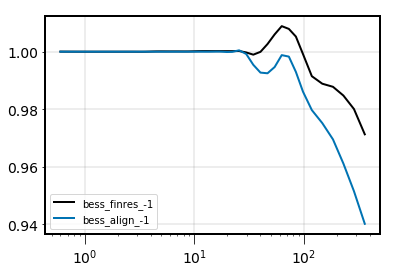

In [4]:
thisexp = 'bess'
exp = explist[thisexp]()
theta = exp.data_flux.keys()[0]
fig = plt.figure()
modvalue = -1
pbuffer = {}
for iparam in range(len(exp.exp_params.keys())):
#for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_flux[theta][0],
             exp.data_flux_mod[theta][1]/exp.data_flux[theta][1],
             label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)
#plt.yscale('log')

In [5]:
for experiment in explist.keys():

    exp = explist[experiment]()
    print exp.experiment
    for theta in exp.data_ratio.keys():

        # Original dataset
        # dataset = exp.data_ratio[theta]
        
        mybool = ~np.isnan(exp.data_ratio_mod[theta][1])

        # Modified datasets
        fig = plt.figure()
        ax = fig.add_supblot(111)
        plt.title(exp.experiment + '_' + theta[:-2])
        for param in exp.exp_params.keys():
            for modvalue in [1]:
                exp.get_mod_data({param : modvalue})
                

                plt.plot(exp.data_ratio[theta][0][mybool],
                         exp.data_ratio_mod[theta][1][mybool]/exp.data_ratio[theta][1][mybool],
                         label = param + "_" + "%i" % modvalue)

        ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
        plt.xscale('log')
        plt.ylim(0.9, 1.1)
        plt.ylabel('Ratio to nominal')
        plt.xlabel('Energy (GeV)')
        plt.legend(loc=0)
        fig.savefig(os.path.join(outdir, 
                                 'ratio', experiment+"_"+theta+'.png'),
                                 dpi=200.)
        plt.close()

bess_he


AttributeError: 'Figure' object has no attribute 'add_supblot'

<Figure size 432x288 with 0 Axes>

## Testing each experiment after reviewing the paper

In [6]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules')
import exp_classes
reload(exp_classes)
import mufit_config
import CBcm

explist= {'opera': exp_classes.OPERA,
       'minos': exp_classes.MINOS,
       'bess': exp_classes.BessHE,
       'cms': exp_classes.CMS,
       'ams': exp_classes.AMS,
       'amsratio': exp_classes.AMSratio,
       'deis': exp_classes.DEIS,
       'l3c': exp_classes.L3c
      }

### AMS

### L3 cosmic

In [7]:
labels = ['vertical scale',r'$p$ resolution',r'$E$ losses', 
                       'overburden',r'$B$ field strength','Alignment','horizontal scale']
for ilabel in range(len(labels)):
    labels[ilabel] = 'L3+c ' + labels[ilabel]

In [19]:
import quickflux2
mceq = quickflux2.MCEq_fastflux(flux_tables='daemon-v4')

/home/jp/projects/atm_nu/mceq_tysak/muon_fit/modules/resources/daemonsplines_20230323_2.pkl
Entering version with 5 entries
Excluded params removed from known_params.
No calibration file for daemon-v4
('Did not find an average flux', KeyError('average',))
Adjusting DEIS name


In [53]:
thisexp = 'l3c'
exp = explist[thisexp](mceq=mceq)

In [54]:
exp.get_mceq_flux_prefit()

In [55]:
exp.exp_params.keys()

['l3c_normHor',
 'l3c_align',
 'l3c_bfield',
 'l3c_overb',
 'l3c_eloss',
 'l3c_pres',
 'l3c_normVert']

In [51]:
l3ckeys = [ 'l3c_normVert',
            'l3c_pres',
            'l3c_eloss',
            'l3c_overb',
            'l3c_bfield',
            'l3c_align',
           'l3c_normHor']


labels = ['vertical scale',r'$p$ resolution',r'$E$ losses', 
                       'overburden',r'$B$ field strength','Alignment','horizontal scale']
for ilabel in range(len(labels)):
    labels[ilabel] = 'L3+C ' + labels[ilabel]
l3c_values = [1,1, -1, 1, -1, -1, 1]

16.9617
[1.00077941 1.00106994 1.00147857 1.00213404 1.00342297 1.00579011
 1.01016542 1.02126597 1.06498227]


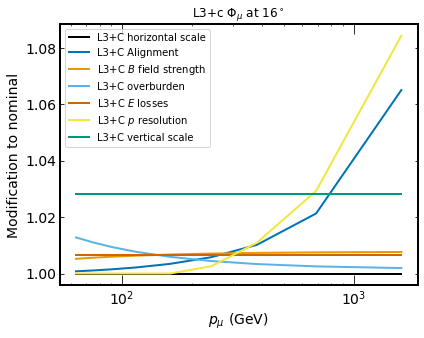

In [64]:
thisexp = 'l3c'
#exp = explist[thisexp]()
theta = exp.data_flux.keys()[6]
#theta = exp.data_flux.keys()[6]

print(theta)
fig = plt.figure(figsize=(5*1.2,4*1.2))
ax = fig.add_subplot(111)
modvalue = 1
pbuffer = {}
#for iparam in range(len(exp.exp_params.keys())):
for iparam in range(len(l3ckeys) -1, -1,-1):
    pbuffer = {}
    #thisvalue =modvalue

    pbuffer.update({l3ckeys[iparam]: l3c_values[iparam]})
    exp.get_mod_data(pbuffer)
    
    thisratio = exp.data_flux_mod[theta][1]/exp.data_flux[theta][1]
    if 'align' in l3ckeys[iparam]:
        exp.get_mceq_flux()
        exp.apply_alignment_to_model(pbuffer)
        thisratio = exp.model_flux[theta]/exp.model_flux_prefit[theta]
        print(thisratio)

    plt.plot(exp.data_flux[theta][0],
             thisratio,
             #label=exp.exp_params.keys()[iparam])
             label = labels[iparam])
                #)#label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xscale('log')
plt.legend(loc=0)
#plt.yscale('log')
plt.title(r'L3+c $\Phi_\mu$ at ' + theta[:2] + r'$^\circ$')
plt.xlabel(r'$p_\mu$ (GeV)')
plt.ylabel('Modification to nominal')
plt.tight_layout()
plt.grid(False)
fig.savefig(os.path.join('/home/jp/projects/atm_nu/ddm_results/muon_results', thisexp+'1_params_prd.pdf'))

55.7711
[1.00012109 1.00023939 1.00042806 1.0007589  1.00144686 1.00273702
 1.00510634 1.0109734  1.03261948]


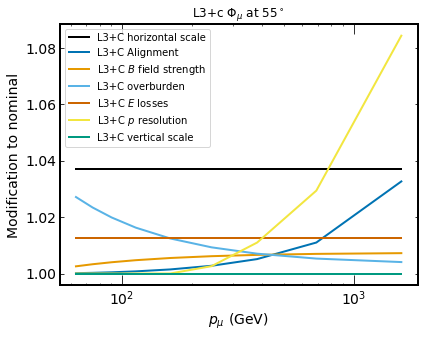

In [65]:
thisexp = 'l3c'
#exp = explist[thisexp]()
theta = exp.data_flux.keys()[3]
#theta = exp.data_flux.keys()[6]

print(theta)
fig = plt.figure(figsize=(5*1.2,4*1.2))
ax = fig.add_subplot(111)
modvalue = 1
pbuffer = {}
#for iparam in range(len(exp.exp_params.keys())):
for iparam in range(len(l3ckeys) -1, -1,-1):
    pbuffer = {}
    #thisvalue =modvalue

    pbuffer.update({l3ckeys[iparam]: l3c_values[iparam]})
    exp.get_mod_data(pbuffer)
    
    thisratio = exp.data_flux_mod[theta][1]/exp.data_flux[theta][1]
    if 'align' in l3ckeys[iparam]:
        exp.get_mceq_flux()
        exp.apply_alignment_to_model(pbuffer)
        thisratio = exp.model_flux[theta]/exp.model_flux_prefit[theta]
        print(thisratio)

    plt.plot(exp.data_flux[theta][0],
             thisratio,
             #label=exp.exp_params.keys()[iparam])
             label = labels[iparam])
                #)#label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xscale('log')
plt.legend(loc=0)
#plt.yscale('log')
plt.title(r'L3+c $\Phi_\mu$ at ' + theta[:2] + r'$^\circ$')
plt.xlabel(r'$p_\mu$ (GeV)')
plt.ylabel('Modification to nominal')
plt.tight_layout()
plt.grid(False)
fig.savefig(os.path.join('/home/jp/projects/atm_nu/ddm_results/muon_results', thisexp+'2_params_prd.pdf'))

AMS: Adding errors in quadrature


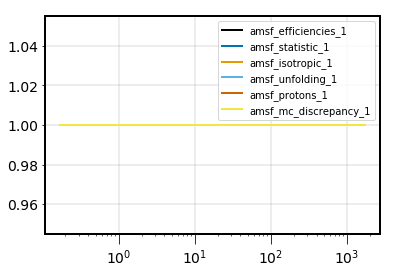

In [17]:
thisexp = 'ams'
exp = explist[thisexp]()
theta = exp.data_flux.keys()[0]
fig = plt.figure()
modvalue = 1
pbuffer = {}
for iparam in range(len(exp.exp_params.keys())):
#for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    
    pbuffer.update({l3ckeys[iparam]: l3c_values[iparam]})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_flux[theta][0],
             exp.data_flux_mod[theta][1]/exp.data_flux[theta][1],
             label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)
#plt.yscale('log')

55.7711


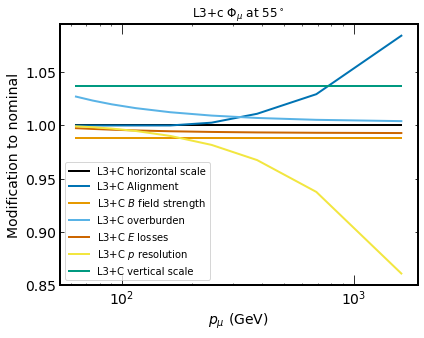

In [18]:
thisexp = 'l3c'
exp = explist[thisexp]()
theta = exp.data_flux.keys()[3]
#theta = exp.data_flux.keys()[6]

print(theta)
fig = plt.figure(figsize=(5*1.2,4*1.2))
ax = fig.add_subplot(111)
modvalue = 1
pbuffer = {}
#for iparam in range(len(exp.exp_params.keys())):
for iparam in range(len(exp.exp_params.keys()) -1, -1,-1):
    pbuffer = {}
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_flux[theta][0],
             exp.data_flux_mod[theta][1]/exp.data_flux[theta][1],
             label = labels[iparam])#exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xscale('log')
plt.legend(loc=0)
#plt.yscale('log')
plt.xlabel(r'$p_\mu$ (GeV)')
plt.title(r'L3+c $\Phi_\mu$ at ' + theta[:2] + r'$^\circ$')
plt.ylabel('Modification to nominal')
plt.tight_layout()
plt.grid(False)
#fig.savefig(os.path.join('/home/jp/projects/atm_nu/ddm_results/muon_results', thisexp+'2_params_s5.pdf'))

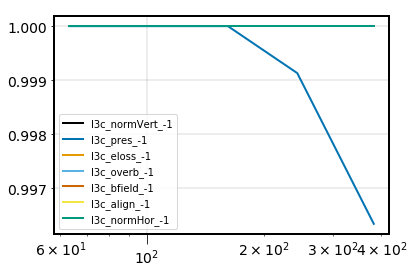

In [38]:
thisexp = 'l3c'
exp = explist[thisexp]()
theta = exp.data_ratio.keys()[3]
fig = plt.figure()
modvalue = -1
pbuffer = {}
#for iparam in range(len(exp.exp_params.keys())):
for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    pbuffer = {}
    mybool = ~np.isnan(exp.data_ratio_mod[theta][1])
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_ratio[theta][0][mybool],
             exp.data_ratio_mod[theta][1][mybool]/exp.data_ratio[theta][1][mybool],
             label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)

amsratio_protons
amsratio_mc
amsratio_statistics


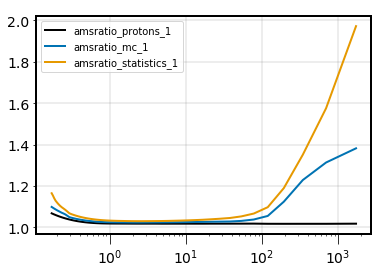

In [8]:
thisexp = 'amsratio'
exp = explist[thisexp]()
theta = exp.data_ratio.keys()[0]
fig = plt.figure()
modvalue = 1
pbuffer = {}
for iparam in range(len(exp.exp_params.keys())):
#for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    print exp.exp_params.keys()[iparam]
    mybool = ~np.isnan(exp.data_ratio_mod[theta][1])
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_ratio[theta][0][mybool],
             exp.data_ratio_mod[theta][1][mybool]/exp.data_ratio[theta][1][mybool],
             label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)

### BESS

### AMS ratio

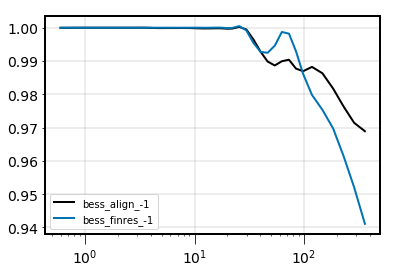

In [16]:
thisexp = 'bess'
exp = explist[thisexp]()
theta = exp.data_flux.keys()[0]
fig = plt.figure()
modvalue = -1
pbuffer = {}
#for iparam in range(len(exp.exp_params.keys())):
for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_flux[theta][0],
             exp.data_flux_mod[theta][1]/exp.data_flux[theta][1],
             label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)

bess_align
bess_finres


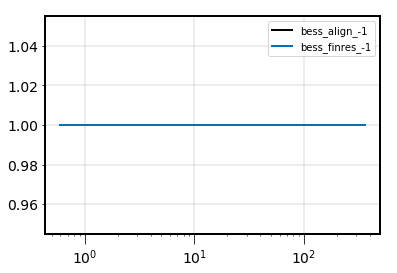

In [17]:
thisexp = 'bess'
exp = explist[thisexp]()
theta = exp.data_ratio.keys()[0]
fig = plt.figure()
modvalue = -1
pbuffer = {}
#for iparam in range(len(exp.exp_params.keys())):
for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    print exp.exp_params.keys()[iparam]
    mybool = ~np.isnan(exp.data_ratio_mod[theta][1])
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_ratio[theta][0][mybool],
             exp.data_ratio_mod[theta][1][mybool]/exp.data_ratio[theta][1][mybool],
             label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)

### DEIS

<Figure size 432x288 with 0 Axes>

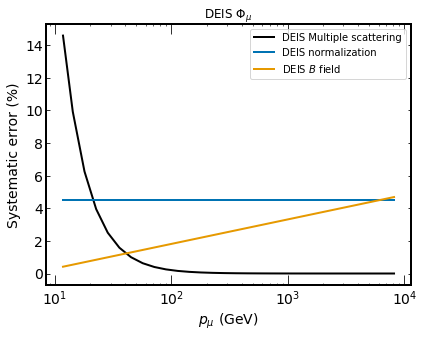

In [13]:
thisexp = 'deis'
exp = explist[thisexp]()
theta = exp.data_flux.keys()[0]
fig = plt.figure()
modvalue = -1
pbuffer = {}
fig = plt.figure(figsize=(5*1.2,4*1.2))
ax = fig.add_subplot(111)
labels = ['DEIS Multiple scattering', 'DEIS normalization', r'DEIS $B$ field']
for iparam in range(len(exp.exp_params.keys())):
#for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    pbuffer = {}
    pbuffer.update({exp.exp_params.keys()[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_flux[theta][0],
             np.abs((exp.data_flux_mod[theta][1]-exp.data_flux[theta][1])/exp.data_flux[theta][1])*100.,
             label=labels[iparam])
             #label = exp.exp_params.keys()[iparam] + "_" + "%i" % modvalue)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xscale('log')
plt.legend(loc=0)
plt.xlabel(r'$p_\mu$ (GeV)')
plt.title(r'DEIS $\Phi_\mu$')
plt.ylabel('Systematic error (%)')
plt.tight_layout()
plt.grid(False)
fig.savefig(os.path.join('/home/jp/projects/atm_nu/ddm_results/muon_results', thisexp+'_params_s5.pdf'))

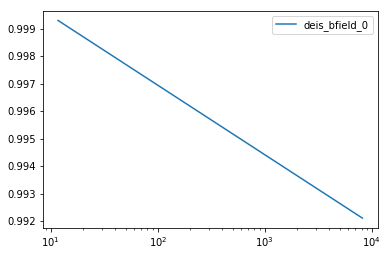

In [21]:
thisexp = 'deis'
exp = explist[thisexp]()
theta = exp.data_flux.keys()[0]
fig = plt.figure()
modvalue =-0.16828871900048548

pbuffer = {}
pkeys = ['deis_bfield']
for iparam in range(len(pkeys)):
#for iparam in range(len(exp.exp_params.keys()) -1, -1 , -1):
    
    pbuffer.update({pkeys[iparam]: modvalue})
    exp.get_mod_data(pbuffer)

    plt.plot(exp.data_flux[theta][0],
             exp.data_flux_mod[theta][1]/exp.data_flux[theta][1],
             label = pkeys[iparam] + "_" + "%i" % modvalue)
plt.xscale('log')
plt.legend(loc=0)

In [15]:
exp.get_mod_data({'bess_align':-2, 'bess_nonsense':3})